In [3]:
#Installing libraries

import pandas as pd
!pip install datasets
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

#Loading data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: C:\Users\zyesn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [4]:
df_us = df[df['job_country'] == 'United States'].dropna(subset='salary_year_avg')

In [5]:
job_titles = df_us['job_title_short'].value_counts().index[:6].to_list()

In [6]:
df_us_top6 = df_us[df_us['job_title_short'].isin(job_titles)]

In [7]:
job_order = df_us_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

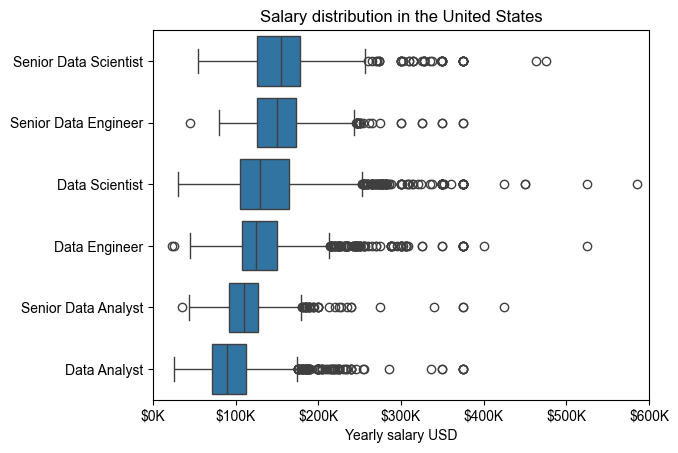

In [8]:
sns.boxplot(data=df_us_top6, x = 'salary_year_avg',  y = 'job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary distribution in the United States')
plt.xlabel('Yearly salary USD')
plt.ylabel('')
plt.xlim(0,600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

### Investigate median salary vs skill for data analysts>

In [9]:
 #creating a new dataframe filtering data analyst role and specifying US market

df_da_us = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()

In [12]:
#dropping na values
df_da_us = df_da_us.dropna(subset='salary_year_avg')

In [ ]:
#exploding
df_da_us = df_da_us.explode('job_skills')

In [21]:
#grouping by job skills and calculating count and median, sorting in desc order based on median salary
#limiting to top 10 paid job skills
df_da_us_top_pay = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median', ascending = False)
df_da_us_top_pay = df_da_us_top_pay.head(10)

In [23]:
#grouping by job skills and calculating count and median, sorting in desc order based on job count
#limiting to top 10 paid job skills
df_da_us_top_skills = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending = False)
df_da_us_top_skills = df_da_us_top_skills.head(10).sort_values(by='median', ascending = False)

In [24]:
df_da_us_top_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


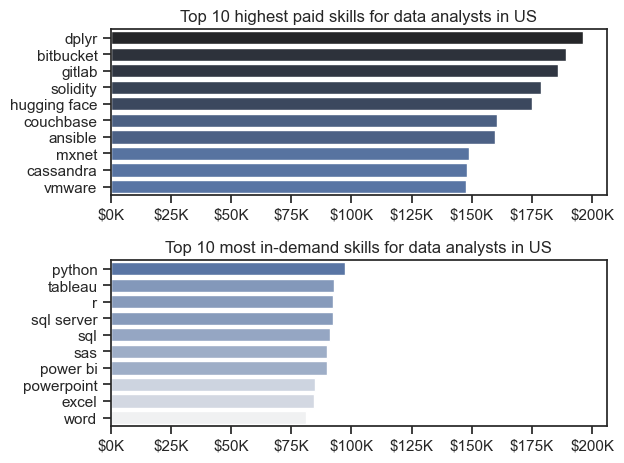

In [ ]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style = 'ticks')

# Top 10 Highest paid skills for data analysts in US
sns.barplot(data = df_da_us_top_pay, x = 'median', y = df_da_us_top_pay.index, hue = 'median', ax = ax[0], palette = 'dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 highest paid skills for data analysts in US')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


# Top 10 most in-demand skills for data analysts in US
sns.barplot(data = df_da_us_top_skills, x = 'median', y = df_da_us_top_skills.index, hue = 'median', palette = 'light:b', ax = ax[1])
ax[1].legend().remove()
ax[1].set_title('Top 10 most in-demand skills for data analysts in US')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim()) #getting ax[0] limits for 2nd graph
plt.tight_layout()